In [ ]:
"""
    Análise de Regressão Linear

O objetivo deste trabalho é analisar a relação entre o **valor do aluguel** e a **metragem dos imóveis**, utilizando técnicas de estatística descritiva, visualização de dados e regressão linear simples.
Pretende-se verificar se existe correlação entre as variáveis e avaliar a qualidade do ajuste do modelo.

👨‍💻 Autor: CLEITON HENTGES
📅 Data: [29/08/2025]
💻 Linguagem: Python 3.x
"""

'\n    Análise de Regressão Linear \n\nO objetivo deste trabalho é analisar a relação entre o **valor do aluguel** e a **metragem dos imóveis**, utilizando técnicas de estatística descritiva, visualização de dados e regressão linear simples.  \nPretende-se verificar se existe correlação entre as variáveis e avaliar a qualidade do ajuste do modelo.\n\n👨\u200d💻 Autor: CLEITON HENTGES\n📅 Data: [29/08/2025]\n💻 Linguagem: Python 3.x\n'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [ ]:
#Checagem de tipos.
print(df.dtypes, '\n')

#Checagem de valores nulos.
valores_nulos = df.isnull().sum()
print(valores_nulos, '\n')

#Checagem de valores digitados errados.
#print('Valor_Aluguel', df['Valor_Aluguel'].unique())
#print('Valor_Condominio', df['Valor_Condominio'].unique())
#print('Metragem', df['Metragem'].unique())
#print('N_Quartos', df['N_Quartos'].unique())
#print('N_banheiros', df['N_banheiros'].unique())
#print('N_Suites', df['N_Suites'].unique())
#print('N_Vagas', df['N_Vagas'].unique())

# Removendo itens que não possuem vaga
print('Linhas executadas:', len(df))
df = df[df['N_Vagas'] != 0]
print('Linhas restantes:', len(df))

#checagem de outilier
df.describe()

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object 

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64 

Linhas executadas: 7203
Linhas restantes: 6909


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000
mean,3015.403821,829.731365,89.451006,2.327689,2.134897,1.052685,1.503112
std,2971.427105,803.552576,62.013345,0.819751,0.980135,0.868348,0.834718
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000
25%,1400.000000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,600.000000,68.000000,2.000000,2.000000,1.000000,1.000000
75%,3350.000000,1000.000000,101.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000


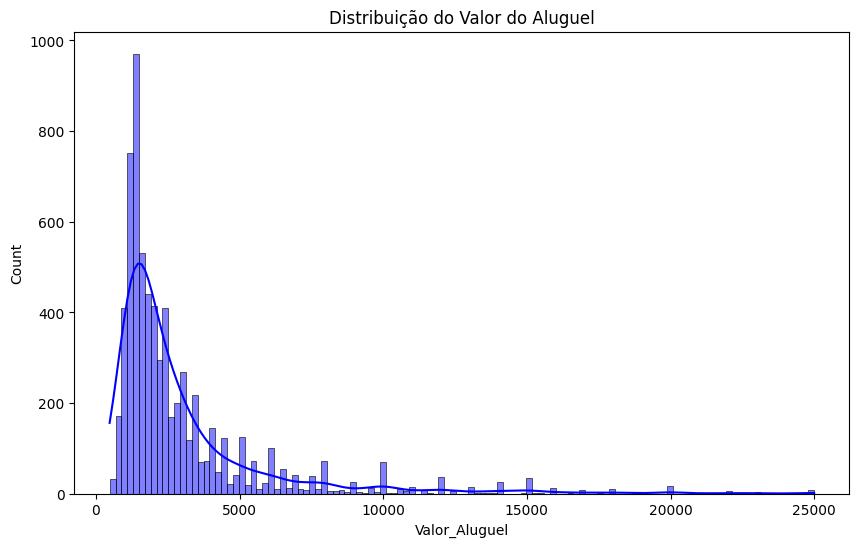

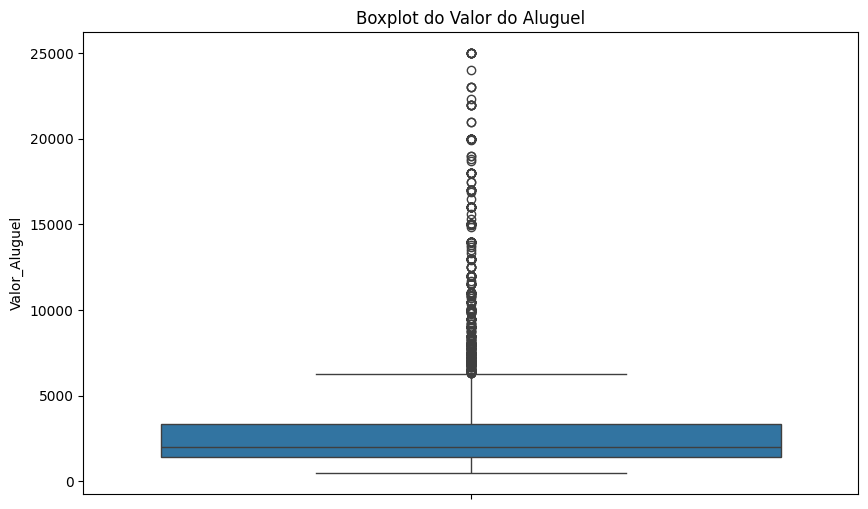

Linhas executadas: 6909
Linhas restantes: 6006


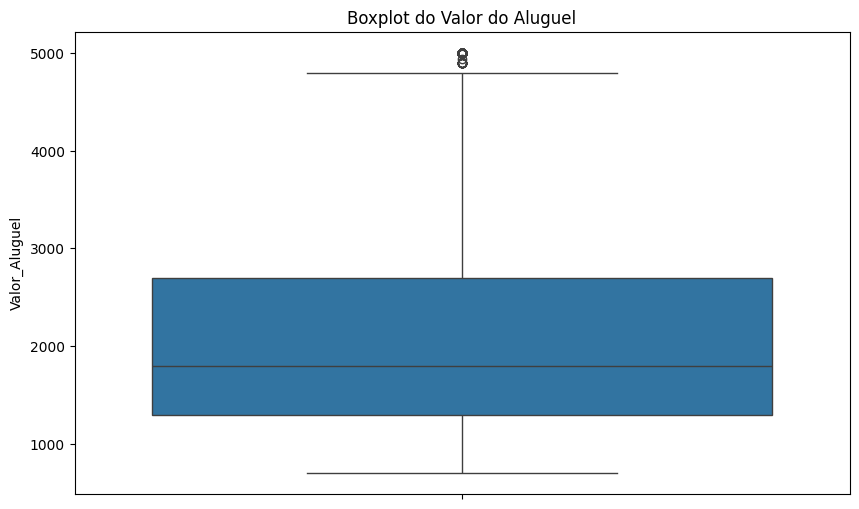

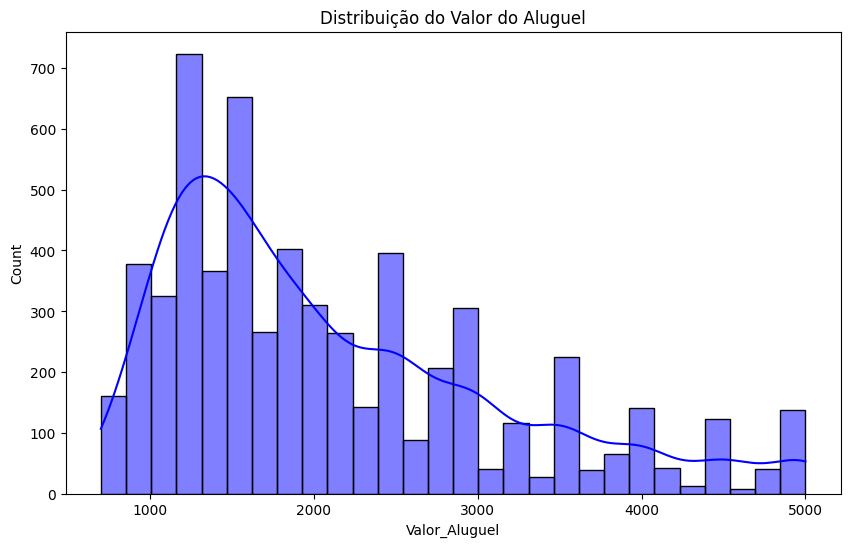

In [ ]:
#Tratamento de outliers
# Analisando a distribuição de Valor Aluguel
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor_Aluguel'] , kde=True, label='Original', color='Blue')
plt.title('Distribuição do Valor do Aluguel')
plt.show()

# Identificando outliers com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Valor_Aluguel'])
plt.title('Boxplot do Valor do Aluguel')
plt.show()

# Método de tratamento: Limitação por faixa de preço.
print('Linhas executadas:', len(df))

# Definindo os valores mínimo e máximo fixos
valor_min = 700
valor_max = 5000

# Filtrando o DataFrame para manter apenas os valores dentro desse intervalo
df_tratado2 = df[(df['Valor_Aluguel'] >= valor_min) & (df['Valor_Aluguel'] <= valor_max)].copy()
df = df_tratado2

print('Linhas restantes:', len(df))

# Conferindo Remoção de outliers com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Valor_Aluguel'])
plt.title('Boxplot do Valor do Aluguel')
plt.show()

# Analisando a distribuição de Valor_Aluguel
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor_Aluguel'] , kde=True, label='Original', color='Blue')
plt.title('Distribuição do Valor do Aluguel')
plt.show()


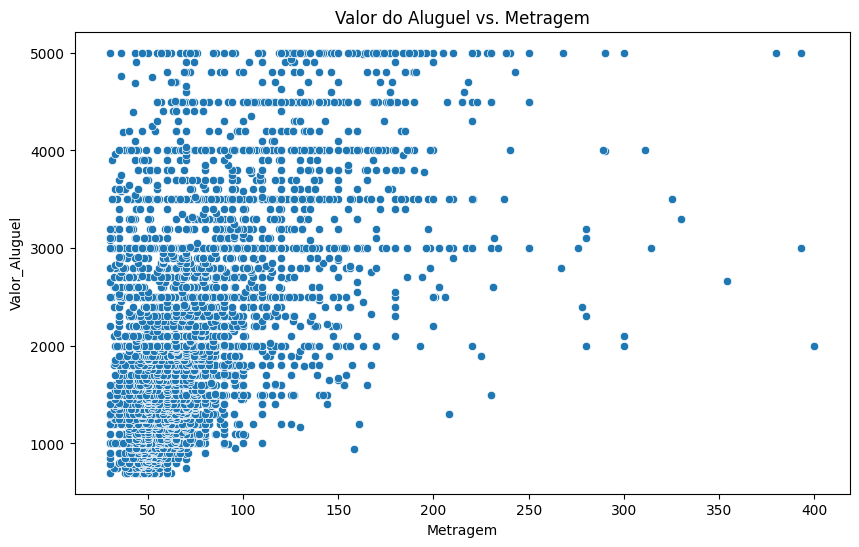

In [ ]:
# 1. Gráfico de dispersão entre Valor_Aluguel e Metragem.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df_tratado2) # Corrected: data=df_tratado2
plt.title('Valor do Aluguel vs. Metragem')
plt.show()

Podemos observar uma tendência positiva entre valor e metragem.

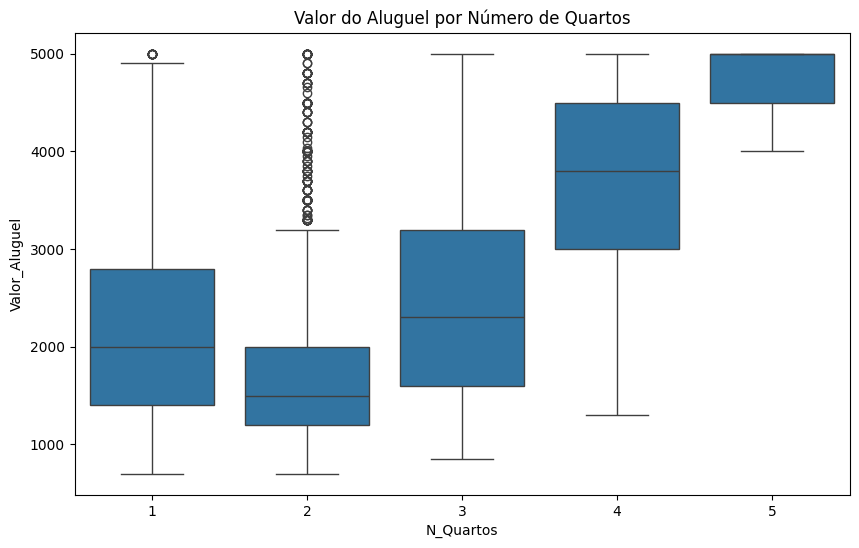

In [ ]:
# 2. Gráfico de barras para N_Quartos vs Valor_Aluguel (agrupando valores).
plt.figure(figsize=(10, 6))
sns.boxplot(x='N_Quartos', y='Valor_Aluguel', data=df)
plt.title('Valor do Aluguel por Número de Quartos')
plt.show()

Como o valor do aluguel se comporta de acordo com o número de quartos

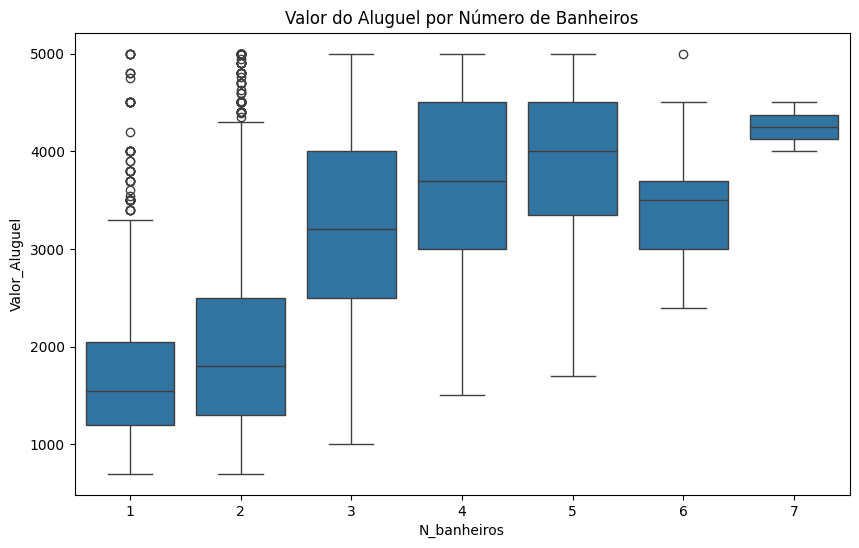

In [ ]:
# 3. Boxplot de Valor do Aluguel por Número de Banheiros
plt.figure(figsize=(10, 6))
sns.boxplot(x='N_banheiros', y='Valor_Aluguel', data=df)
plt.title('Valor do Aluguel por Número de Banheiros')
plt.show()

Analisar a distribuição do valor do aluguel para diferentes quantidades de banheiros, permitindo identificar se há variações significativas nos valores para imóveis com mais banheiros.

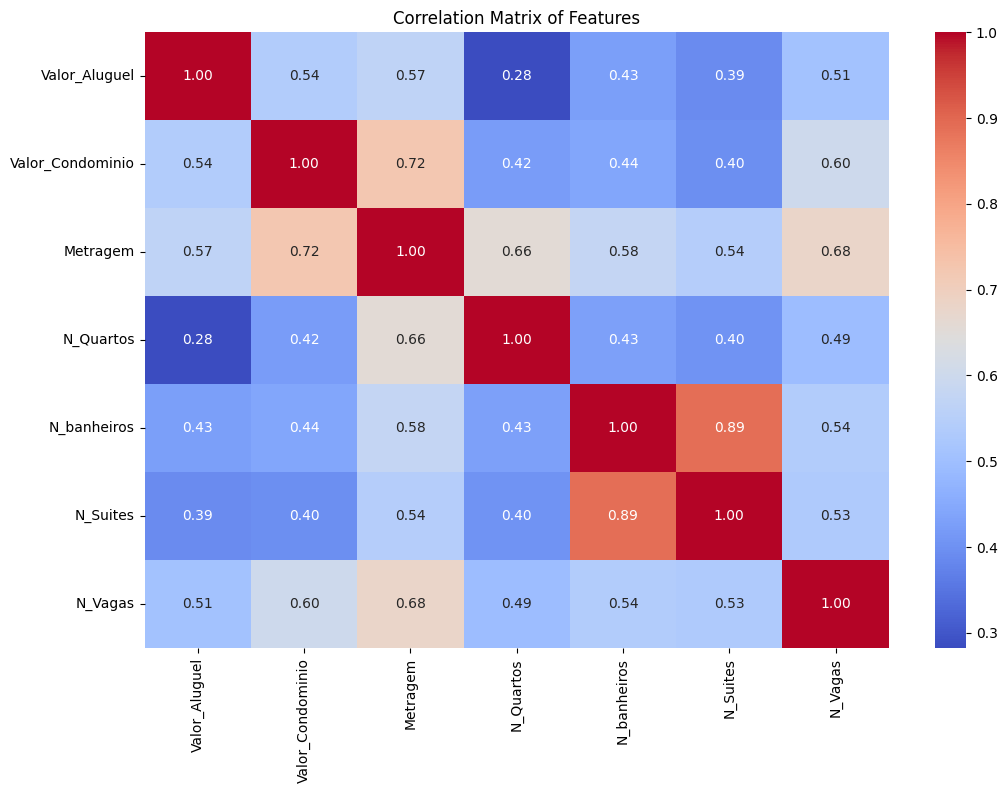

Valor_Aluguel       1.000000
Metragem            0.565921
Valor_Condominio    0.539493
N_Vagas             0.507157
N_banheiros         0.426582
N_Suites            0.388774
N_Quartos           0.281904
Name: Valor_Aluguel, dtype: float64


In [ ]:
# matriz de correlação
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

print(correlation_matrix['Valor_Aluguel'].sort_values(ascending=False))

Shapes após divisão:
X_train: (4504, 6)
X_test: (1502, 6)
y_train: (4504,)
y_test: (1502,)
Intercepto: 980.6120748850358
Coeficiente: [15.118358]


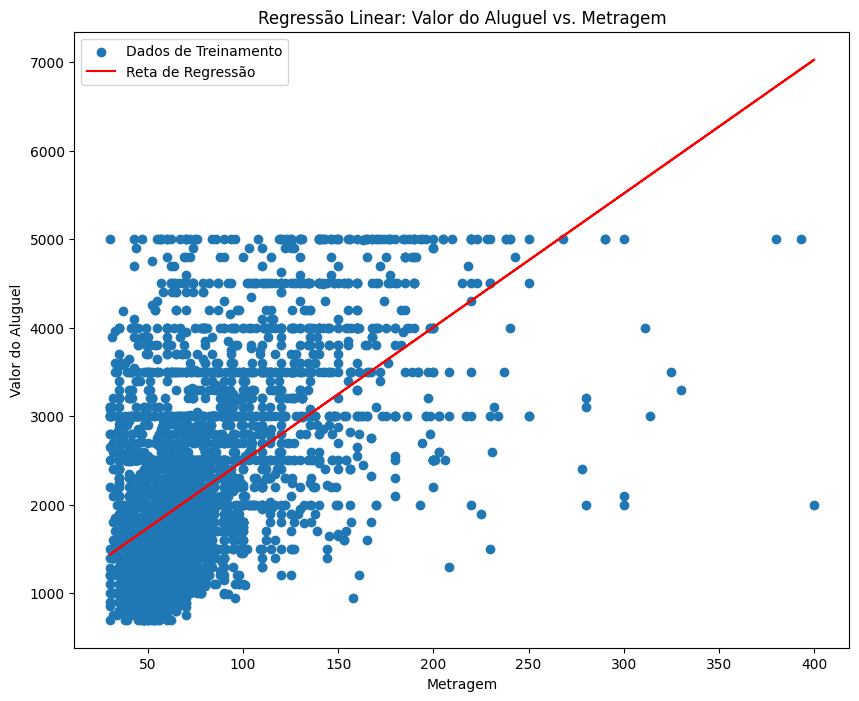


Equação da reta:
Valor do Aluguel = 980.61 + 15.12 * Metragem


In [ ]:
# separação do dataframe para equação
X = df[['Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]
y = df['Valor_Aluguel']

X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

#Dividindo os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Changed 'x' to 'X'

print("Shapes após divisão:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train[['Metragem']], y_train) # Usando apenas a coluna 'Metragem'

print('Intercepto:', modelo.intercept_)
print('Coeficiente:', modelo.coef_)

# Plotando o intercepto e o coeficiente
plt.figure(figsize=(10, 8))
plt.scatter(X_train['Metragem'], y_train, label='Dados de Treinamento')
plt.plot(X_train['Metragem'], modelo.predict(X_train[['Metragem']]), color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear: Valor do Aluguel vs. Metragem')
plt.legend()
plt.show()

# Montando a equação da reta de forma extensa
intercept = modelo.intercept_
coef = modelo.coef_[0]

equation = f"Valor do Aluguel = {intercept:.2f} + {coef:.2f} * Metragem"
print(f"\nEquação da reta:\n{equation}")


In [ ]:
from sklearn.metrics import r2_score

# Fazendo previsões com conjunto de teste
y_pred = modelo.predict(X_test[['Metragem']])

# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f"R² do modelo: {r2}")

# Usando o modelo treinado para fazer previsões sobre os dadosf de teste
previsoes = modelo.predict(X_test[['Metragem']])

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(X_test[['Metragem']], y_test)
print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

# Notei que se eu remover o filtro de outilier terei o coeficiente de 0.5497562993183114

R² do modelo: 0.3056273380587864
Coeficiente de Determinação (R²) nos Dados de Teste: 0.3056273380587864


Intercepto: 963.4087028943163
Coeficientes: [   0.47367833    9.05734308 -235.65108607  192.70508073  -49.56345539
  266.96837374]
R² do modelo: 0.3674376364082992


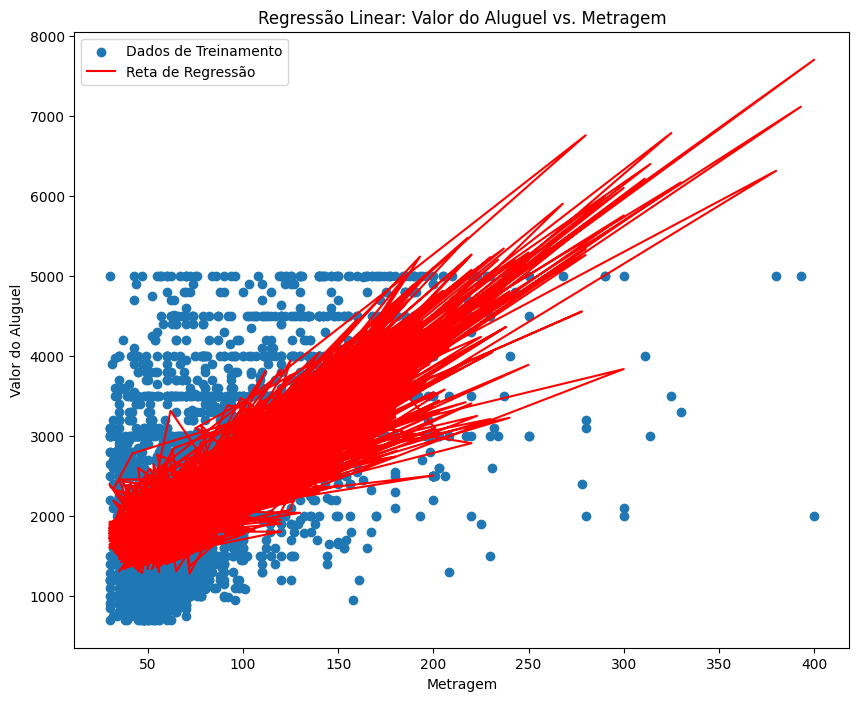

In [ ]:
#Multipla Regressão Linear

X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

#Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print('Intercepto:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)

# Fazendo previsões no conjunto
y_pred = modelo.predict(X_test)

# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f"R² do modelo: {r2}")

#exibindo o gráfico somente para mostrar que os dados se entrelaçam de maneira desordenada;

plt.figure(figsize=(10, 8))
plt.scatter(X_train['Metragem'], y_train, label='Dados de Treinamento')
plt.plot(X_train['Metragem'], modelo.predict(X_train), color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear: Valor do Aluguel vs. Metragem')
plt.legend()
plt.show()
